In [1]:

import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot 
import pandas as pd 
from statsmodels.tsa import seasonal 

In [3]:
netflix = pd.read_csv('netflix.googletrends.csv', parse_dates = ['period'])
netflix['period'] = netflix['period'].dt.date
netflix.set_index('period', inplace = True)

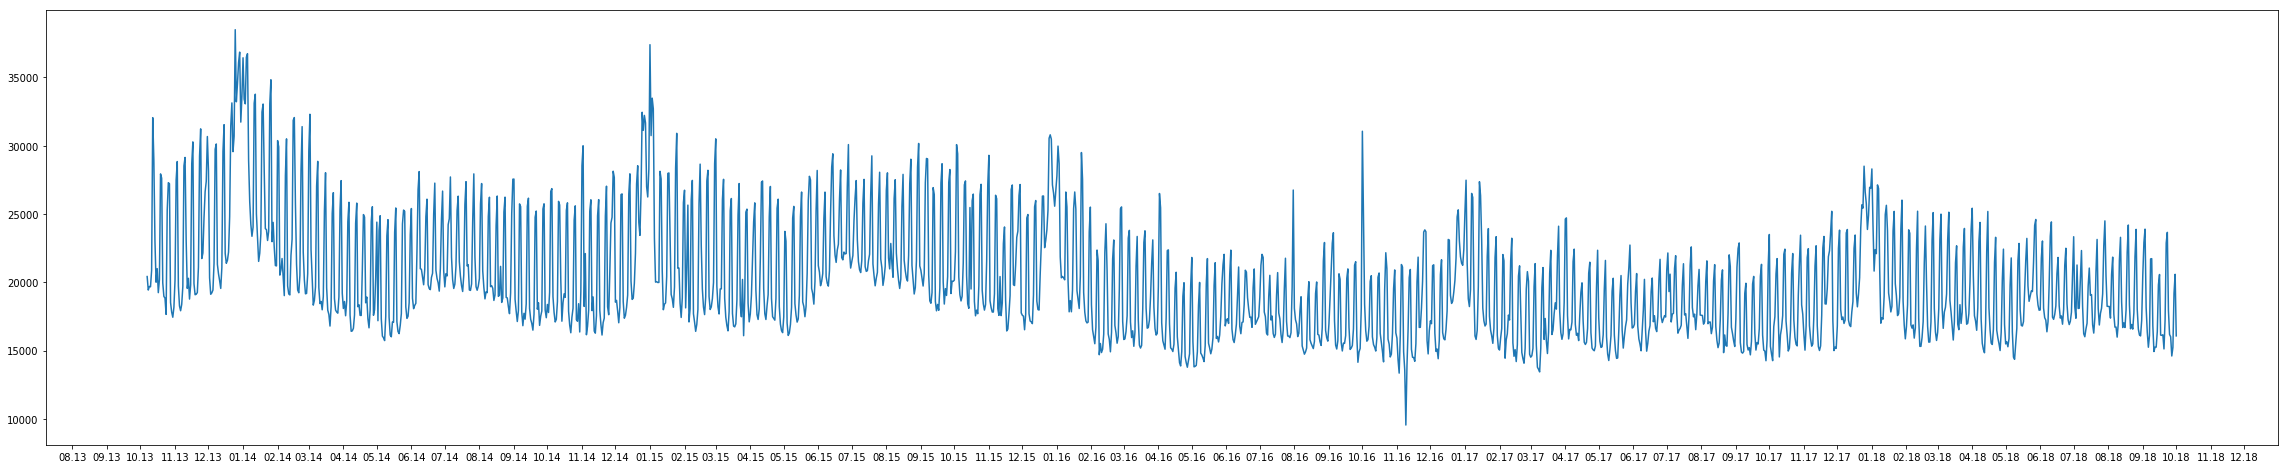

In [8]:
#make chart bigger 
dimensions = (40,8)
fig, ax = pyplot.subplots(figsize = dimensions)

#differentiate year and month
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearmonth = mdates.DateFormatter('%m.%y')

#set parameters
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearmonth)

#plot
ax.plot(netflix.index, netflix['value'])


In [9]:
decompose_model = seasonal.seasonal_decompose(netflix['value'].tolist(), freq = 365, model = 'addititve')
dir(decompose_model)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

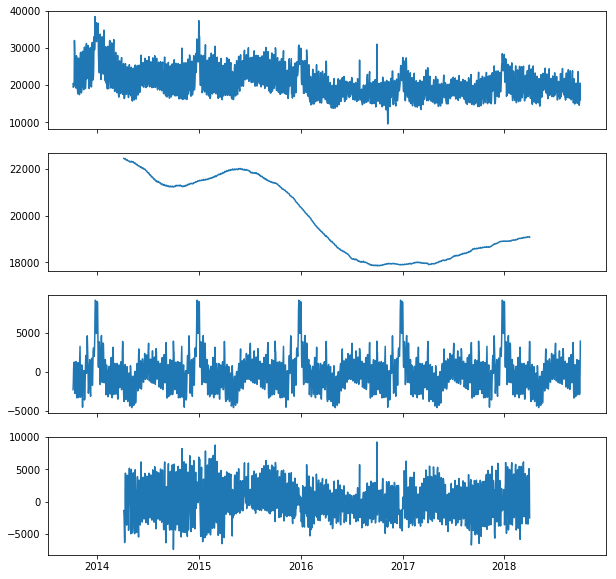

In [10]:
#four plots same axis 
dimensions = (10,10)
fig,(ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize = dimensions, sharex = 'all')
ax1.plot(netflix.index, netflix['value'])
ax2.plot(netflix.index, decompose_model.trend)#moving positive trend 
ax3.plot(netflix.index, decompose_model.seasonal)#fixed, the same every year, overfit--> could be fixed with exponetial smoothing
ax4.plot(netflix.index, decompose_model.resid)#outliers exist, why?



In [11]:
netflix['seasonal'] = decompose_model.seasonal

In [12]:
startdate = pd.to_datetime("2015-01-01").date()
enddate = pd.to_datetime("2015-12-31").date()


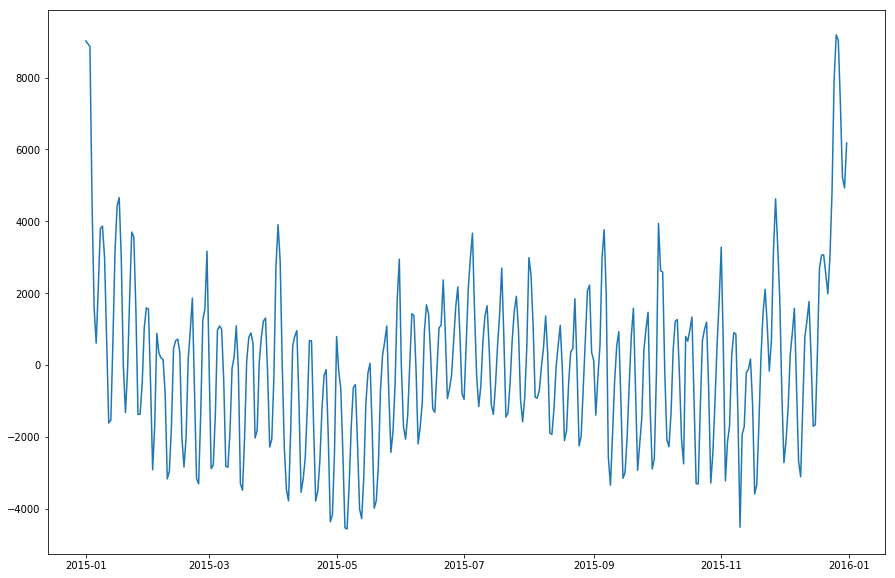

In [13]:
oneyear = netflix.loc[startdate:enddate]#slice data based off index
dimensions = (15,10)
fig, ax1 = pyplot.subplots(figsize = dimensions) 
pyplot.plot(oneyear.index, oneyear.seasonal)


In [ ]:
#absolutevalues = map(abs,decompose_model.resid.tolist())
